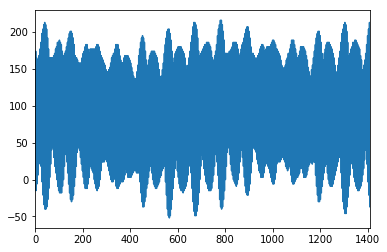

In [19]:
# find similar tidal conditions to the night of the alcatraz escape

import numpy as np
import matplotlib
import matplotlib.style
import matplotlib.pyplot as plt
import dateutil
import pandas
import requests
import io
#matplotlib.style.use('ggplot')
%matplotlib inline

# download high/low tides for 2015, local times, relative to MLLW,
# col 5 (0 based should have water level in cm)
url = 'http://tidesandcurrents.noaa.gov/noaatidepredictions/NOAATidesFacade.jsp?datatype=Annual+TXT&Stationid=9414290&text=datafiles%252F9414290%252F26052015%252F100%252F&imagename=images%2F9414290%2F26052015%2F100%2F9414290_2015-05-27.gif&bdate=20150526&timelength=daily&timeZone=2&dataUnits=1&interval=&edate=20150527&StationName=SAN+FRANCISCO&Stationid_=9414290&state=CA&primary=Harmonic&datum=MLLW&timeUnits=2&ReferenceStationName=SAN+FRANCISCO+%28Golden+Gate%29&ReferenceStation=9414290&HeightOffsetLow=&HeightOffsetHigh=&TimeOffsetLow=0&TimeOffsetHigh=0&pageview=dayly&print_download=true&Threshold=&thresholdvalue='
url = 'http://tidesandcurrents.noaa.gov/noaatidepredictions/NOAATidesFacade.jsp?datatype=Annual+TXT&Stationid=9414290&text=datafiles%252F9414290%252F26052015%252F100%252F&imagename=images%2F9414290%2F26052015%2F100%2F9414290_2015-05-27.gif&bdate=20170301&timelength=daily&timeZone=2&dataUnits=1&interval=&edate=20170801&StationName=SAN+FRANCISCO&Stationid_=9414290&state=CA&primary=Harmonic&datum=MLLW&timeUnits=2&ReferenceStationName=SAN+FRANCISCO+%28Golden+Gate%29&ReferenceStation=9414290&HeightOffsetLow=&HeightOffsetHigh=&TimeOffsetLow=0&TimeOffsetHigh=0&pageview=dayly&print_download=true&Threshold=&thresholdvalue='
resp = requests.get(url)
# open remote content as file like object
f = io.StringIO(resp.text)
# or local
# f = open('/Users/baart_f/Downloads/9414290.Annual TXT')

# read file, not consistently formatted
df = pandas.read_csv(f, sep='\t', skiprows=13)
# should show some lines
df.iloc[:,5].plot()

In [5]:

# download and use

In [23]:
df['dates'] = (df['Date '] + ' ' + df['Day']).apply(dateutil.parser.parse)
df = df.set_index('dates')
import datetime
import numpy as np
idx = np.logical_and(
    df.index >= datetime.datetime(2017, 4, 1), 
    df.index < datetime.datetime(2017, 5, 1)
)


/Users/baart_f/.virtualenvs/main/lib/python3.5/site-packages/ipykernel/__main__.py:10: FutureWarning: icol(i) is deprecated. Please use .iloc[:,i]
/Users/baart_f/.virtualenvs/main/lib/python3.5/site-packages/ipykernel/__main__.py:16: FutureWarning: icol(i) is deprecated. Please use .iloc[:,i]
/Users/baart_f/.virtualenvs/main/lib/python3.5/site-packages/ipykernel/__main__.py:19: FutureWarning: icol(i) is deprecated. Please use .iloc[:,i]
/Users/baart_f/.virtualenvs/main/lib/python3.5/site-packages/ipykernel/__main__.py:23: FutureWarning: icol(i) is deprecated. Please use .iloc[:,i]


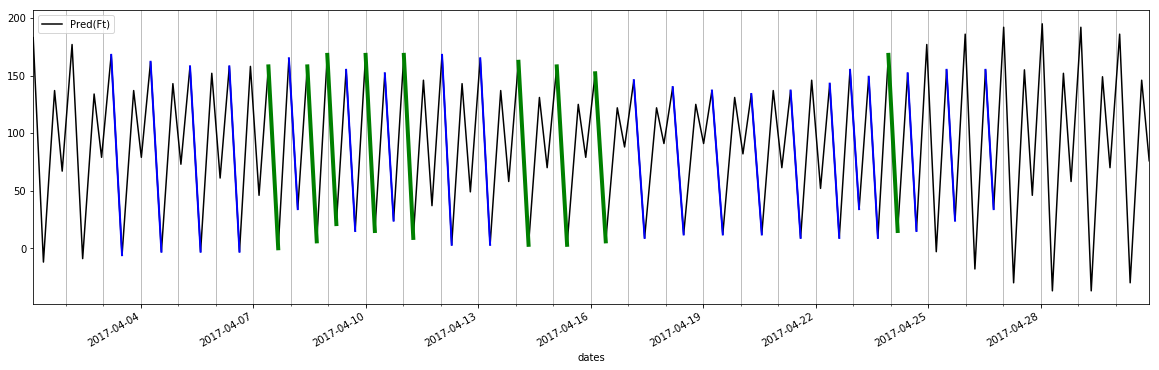

In [24]:
# High low tides, similar to 1962, then the difference was almost 1.5m, according to 
# https://agu.confex.com/data/handout/agu/fm14/Paper_25480_handout_563_0.pdf

# wide plot
fig, ax = plt.subplots(figsize=(20,6))
# timeseries
df[idx].iloc[:,5].plot(ax=ax, color='black')

# find -300 +300 mm difference
ix = np.logical_and((df.icol(5)*10).diff() <  -1200, (df.icol(5)*10).diff() >  -1800)
ids, = np.where(ix) 
for id_ in ids:
    # find previous and current point
    a = df[(id_-1):(id_+1)]
    # plot blue
    ax.plot(a.index, np.array(a.icol(5)), 'b-', linewidth=2)

# find -100 +100mm difference
ix = np.logical_and((df.icol(5)*10).diff() <  -1400, (df.icol(5)*10).diff() >  -1600)
ids, = np.where(ix) 
for id_ in ids:
    a = df[(id_-1):(id_+1)]
    ax.plot(a.index, np.array(a.icol(5)), 'g-', linewidth=4)
# show lines
ax.xaxis.set_minor_locator(matplotlib.dates.DayLocator())
ax.grid(which='minor', axis='x')
plt.legend(loc='best')